In [1]:
import pandas as pd
import numpy as np

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
events_data=pd.read_csv('event_data_train.csv')

In [65]:
submissions_data=pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',compression ='zip')

In [66]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [9]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [10]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [67]:
events_data['date']=pd.to_datetime(events_data.timestamp,unit='s')
submissions_data['date']=pd.to_datetime(events_data.timestamp,unit='s')

In [12]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [13]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [15]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [77]:
events_data['day']=events_data.date.dt.date

In [78]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [79]:
events_data.groupby('day')\
    .user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

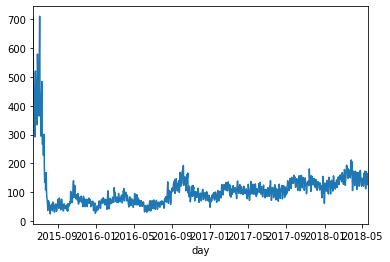

In [80]:
events_data.groupby('day')\
    .user_id.nunique().plot()

In [81]:
events_data[events_data.action=='passed']\
    .groupby('user_id',as_index=False)\
    .agg({'step_id':'count'})\
    .rename(columns={'step_id':'passed_step'}).head()

,user_id,passed_step
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


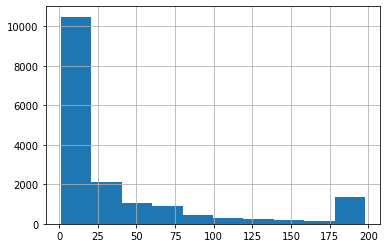

In [82]:
events_data[events_data.action=='passed']\
    .groupby('user_id',as_index=False)\
    .agg({'step_id':'count'})\
    .rename(columns={'step_id':'passed_steps'}).passed_steps.hist()

In [50]:
# events_data[events_data.action=='passed']\
#     .groupby('user_id',as_index=False)\
#     .agg({'step_id':'count'})\
#     .rename(columns={'step_id':'passed_steps'}).passed_steps.min()

1

In [83]:
events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


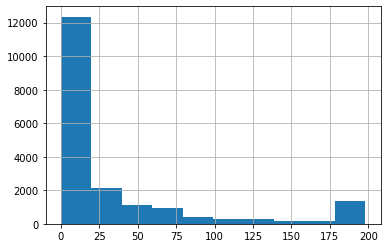

In [60]:
events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index().passed.hist()

In [68]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,correct,15853,2015-06-15 04:00:48
1,31972,1434348300,correct,15853,2015-06-15 04:00:48
2,31972,1478852149,wrong,15853,2015-06-15 04:00:48
3,31972,1478852164,correct,15853,2015-06-15 04:01:35
4,31976,1434348123,wrong,15853,2015-06-15 04:01:35


In [71]:
user_scores=submissions_data.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()

In [72]:
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [74]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [86]:
events_data[['user_id','day','timestamp']].\
    drop_duplicates(subset=['user_id','day']).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [87]:
%config IPCompleter.greedy=True

In [ ]:
a